In [43]:
import jax
import jax.numpy as jnp
from jax import jit, vmap, grad, random

import matplotlib.pyplot as plt

In [44]:
def sigmoid(x):
    return 0.5 * (jnp.tanh(x / 2) + 1)

In [45]:
def f(w, x, y, t):
  wx, wt, wbc, b0 = w[0], w[1], w[2], w[3]
  w0, b1 = w[4], w[5]

  h = sigmoid(jnp.dot(wx, x) + jnp.dot(wt, y) + jnp.dot(wbc, t) + b0)
  return (jnp.dot(w0, h) + b1).squeeze()

# dfdx = grad(f, 1)
dfdt = grad(f, 3)
f_vect = vmap(f, (None, 0, 0, 0))
# dfdx_vect = vmap(dfdx, (None, 0, 0, 0))
dfdt_vect = vmap(dfdt, (None, 0, 0, 0))

# dfdx2 = grad(dfdx, 1)
# dfdt2 = grad(dfdt, 1)
# dfdx2_vect = vmap(dfdx2, (None, 0, 0, 0))
# dfdt2_vect = vmap(dfdt2, (None, 0, 0, 0))

# Superposition of Two Orthogonal Line Solitons  
(Undamped and Damped SG Equation)  
In the case of an undamped 2D sine-Gordon equation (β = 0) with  
ϕ(x, y) = 1, we obtain the superposition of two orthogonal  
line solitons under the given initial conditions:

In [46]:
def loss(w, x, y, t):
  eqn = f_vect(w, x, y, t-t) - 4*jnp.arctan(jnp.exp(x)) - 4*jnp.arctan(jnp.exp(y))
  ic = dfdt_vect(w, x, y, t-t)
  return jnp.mean(eqn**2) + jnp.mean(ic**2)

grad_loss = jit(grad(loss, 0))

and over a square domain of Ω = (x, y) | − 6 ≤ x ≤ 6,  
−6 ≤ y ≤ 6}. The numerical results of u(x, y, t) are shown in  
Figure 2 for t = 1.0, 2.0, 3.0, and 4.0, respectively.

In [47]:
# inputs
x_vals = jnp.linspace(-6, 6, num=40)
y_vals = jnp.linspace(-6, 6, num=40)
t_vals = jnp.linspace(1, 4, num=4)

x = []
y = []
t = []

for i in range(40):
  for j in range(40):
    for k in range(4):
      x.append(x_vals[i])
      y.append(y_vals[j])
      t.append(t_vals[k])

x = jnp.asarray(x)
y = jnp.asarray(y)
t = jnp.asarray(t)

In [48]:
key = random.PRNGKey(0)
keys = [key for key in random.split(key, 6)]

In [49]:
w = [random.normal(keys[0], shape=(80, 1)), random.normal(keys[1], shape=(80, 1)),
     random.normal(keys[2], shape=(80, 1)), random.normal(keys[3], shape=(80, 1)),
     random.normal(keys[4], shape=(1, 80)), random.normal(keys[5], shape=(1, 1))]

In [51]:
epochs = 10001
lr = 0.0005

for epoch in range(epochs):
  if epoch % 1000 == 0:
    print('epoch: %3d, loss: %.6f' % (epoch, loss(w, x, y, t)))
  grads = grad_loss(w, x, y, t)
  w = [w[i]-lr*grads[i] for i in range(len(w))]

epoch:   0, loss: 64.849709
epoch: 1000, loss: 0.650022
epoch: 2000, loss: 0.357617
epoch: 3000, loss: 0.241306
epoch: 4000, loss: 0.182720
epoch: 5000, loss: 0.147331
epoch: 6000, loss: 0.123038
epoch: 7000, loss: 0.105134
epoch: 8000, loss: 0.091404
epoch: 9000, loss: 0.080608
epoch: 10000, loss: 0.071963


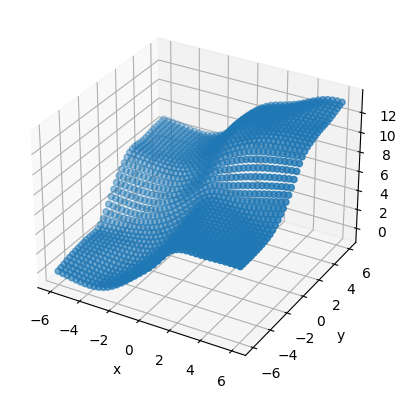

In [53]:
x = []
y = []
t = []

for i in range(40):
  for j in range(40):
    x.append(x_vals[i])
    y.append(y_vals[j])
    t.append(1)

x = jnp.asarray(x)
y = jnp.asarray(y)
t = jnp.asarray(t)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, f_vect(w, x, y, t))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y, t)')
plt.show()
# approximation

In [ ]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter3D(x, t, x*x + t*x + 3)
# ax.set_xlabel('x')
# ax.set_ylabel('t')
# ax.set_zlabel('f(x, t)')
# plt.show()
# analytical solution